In [23]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)


# Read the data

df = pd.read_csv(r'movies.csv', encoding="latin-1") # used latin-1 encoding as utf-8 (default) gave errors. there could be speceial characters in the data set.

In [25]:
df.head() # a preview of data with header


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
# Check if any missing values in columns

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print(f'{col}- {missing*100}')

name- 0.0
rating- 0.0
genre- 0.0
year- 0.0
released- 0.0
score- 0.0
votes- 0.0
director- 0.0
writer- 0.0
star- 0.0
country- 0.0
budget- 0.0
gross- 0.0
company- 0.0
runtime- 0.0


In [31]:
# Drop all rows with null values for the sake of simplicity 

#df = df.dropna()
#df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [39]:
# Check for duplicates
#df.drop_duplicates() - no duplicates in the data set


In [79]:
# Check the correlation matrix for the data set
# set numeric_only = true as there is non-numeric values in the data set
# default method is pearson
df.corr(numeric_only = True)

## from the matrix, budget and score may have some correlation



,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


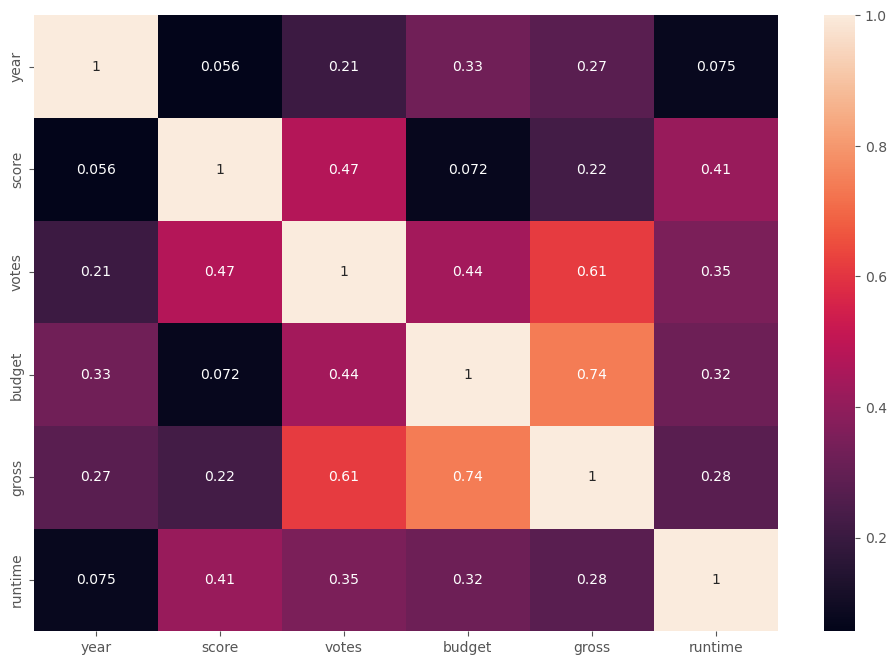

In [81]:
## visuliase correlation matrix for easy readability

correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [73]:
## Correlation matrix using kendall method

df.corr(method = 'kendall', numeric_only = True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [75]:
## Correlation matrix using spearman method

df.corr(method = 'spearman', numeric_only = True)

# find more about different corelation methods as https://www.pickl.ai/blog/exploring-what-is-pandas-dataframe-corr-method-types-and-working/#:~:text=The%20corr()%20method%20in%20Pandas%20is%20a%20powerful%20tool,different%20variables%20in%20the%20data.

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


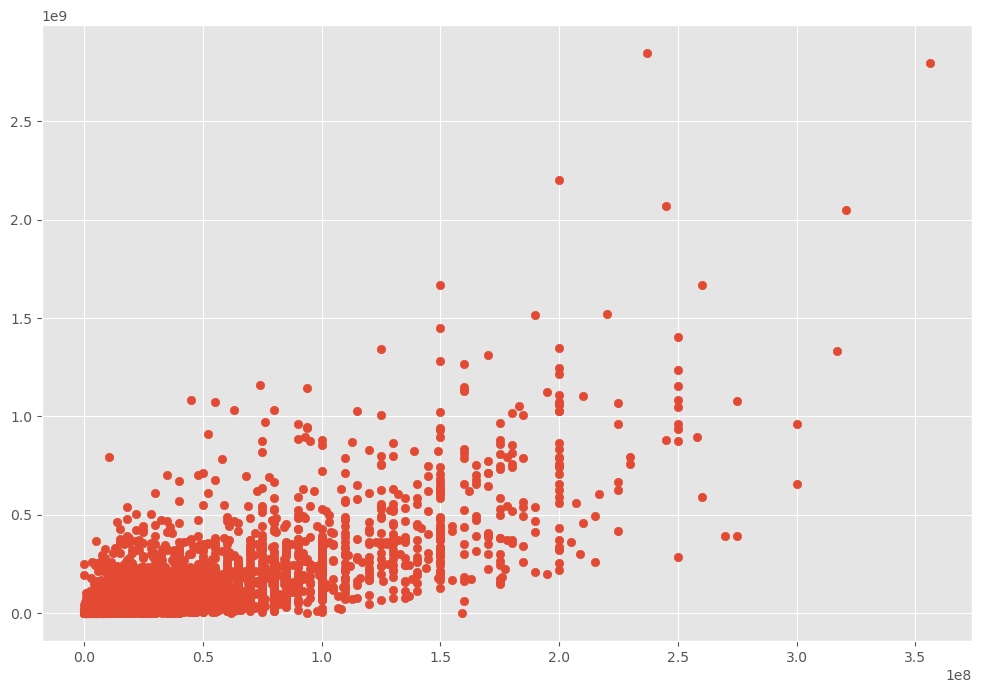

In [63]:
# Scatter plot of budget vs gross earnings using matplotlib

plt.scatter(x = df['budget'], y= df['gross'])
#plt.title('Budget Vs Gross')
#plt.xlabel('Budget')
#plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

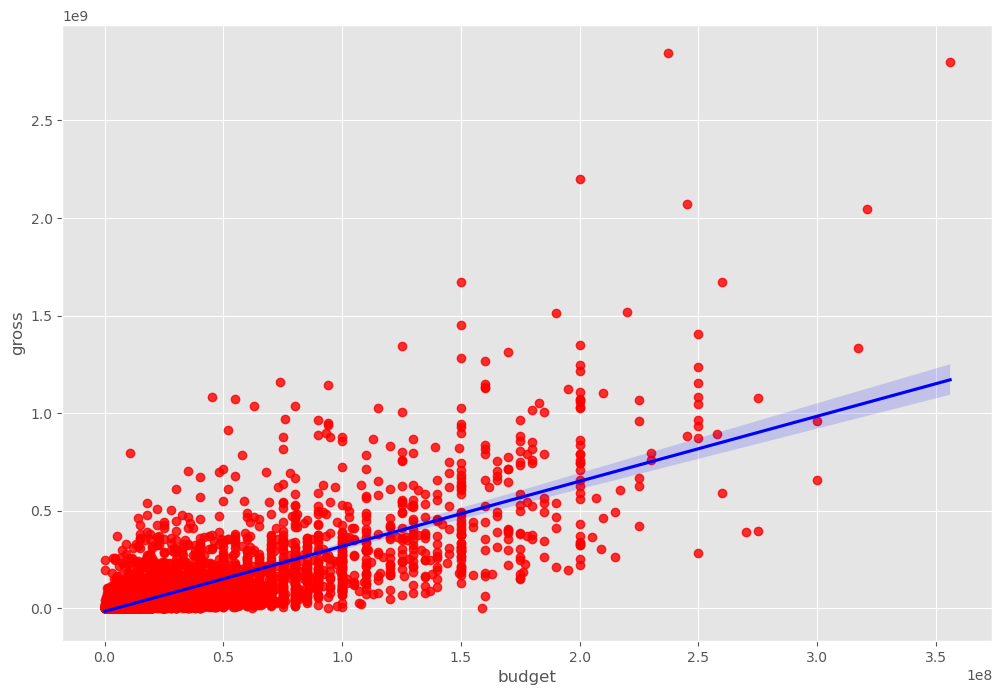

In [67]:
# Plot budget vs gross using seaborn

sns.regplot(x= 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"},line_kws = {"color":"blue"})

In [121]:
## Check the top 10 companies with highest gross revenues till date

company_gross = df.groupby('company')[["gross"]].sum()
company_gross_sorted = company_gross.sort_values('gross', ascending = False)
company_gross_sorted = company_gross_sorted['gross'].astype('int64')
company_gross_sorted[:10]

company
Warner Bros.             54610959970
Universal Pictures       51241105418
Columbia Pictures        42356430218
Paramount Pictures       40021704691
Twentieth Century Fox    39542573303
Walt Disney Pictures     35833650748
New Line Cinema          19612851164
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Dreamworks Pictures      11593807697
Name: gross, dtype: int64

In [123]:
## Check the top 10 years with highest gross revenues

year_gross = df.groupby('year')[["gross"]].sum()
year_gross_sorted = year_gross.sort_values('gross', ascending = False)
year_gross_sorted = year_gross_sorted['gross'].astype('int64')
year_gross_sorted[:10]

year
2016    27847564254
2019    27692665244
2017    27679802575
2018    27558520701
2015    26216913808
2014    26199023290
2013    25699664932
2012    25147707668
2011    23968305935
2009    22640002784
Name: gross, dtype: int64

<Axes: xlabel='rating', ylabel='gross'>

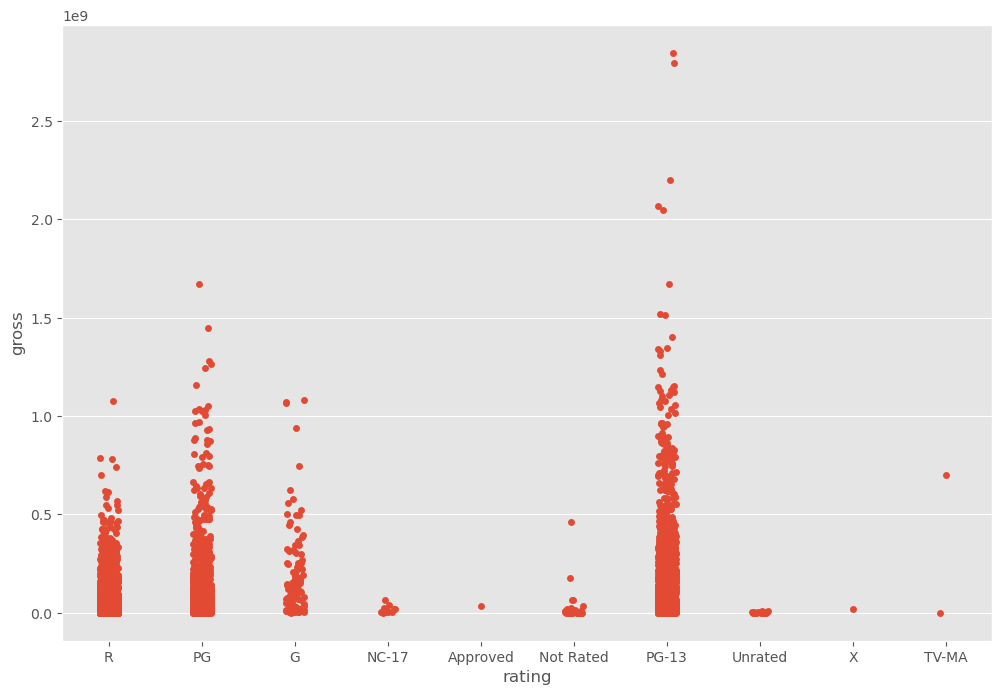

In [128]:
## Visualising distribution of gross revenue by the rating type

sns.stripplot(x="rating", y="gross", data=df)

<Axes: xlabel='rating', ylabel='score'>

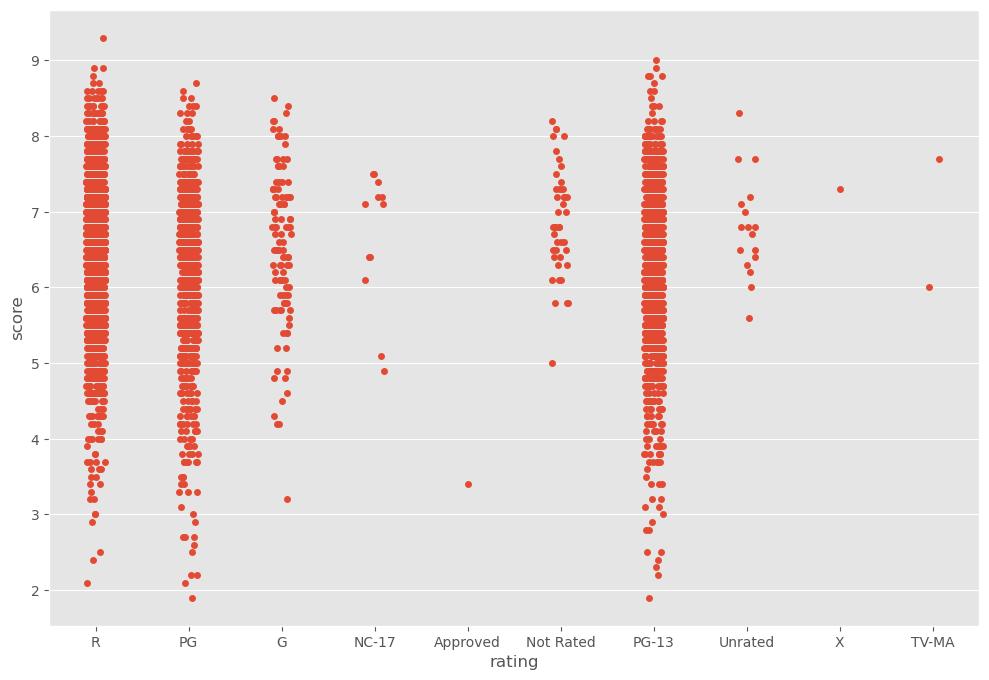

In [130]:
## Visualising distribution of score by rating type

sns.stripplot(x="rating", y="score", data=df)

In [140]:
#year_gross_2 = df.groupby('year').sum('gross')
#year_gross_2


<Axes: xlabel='year', ylabel='gross'>

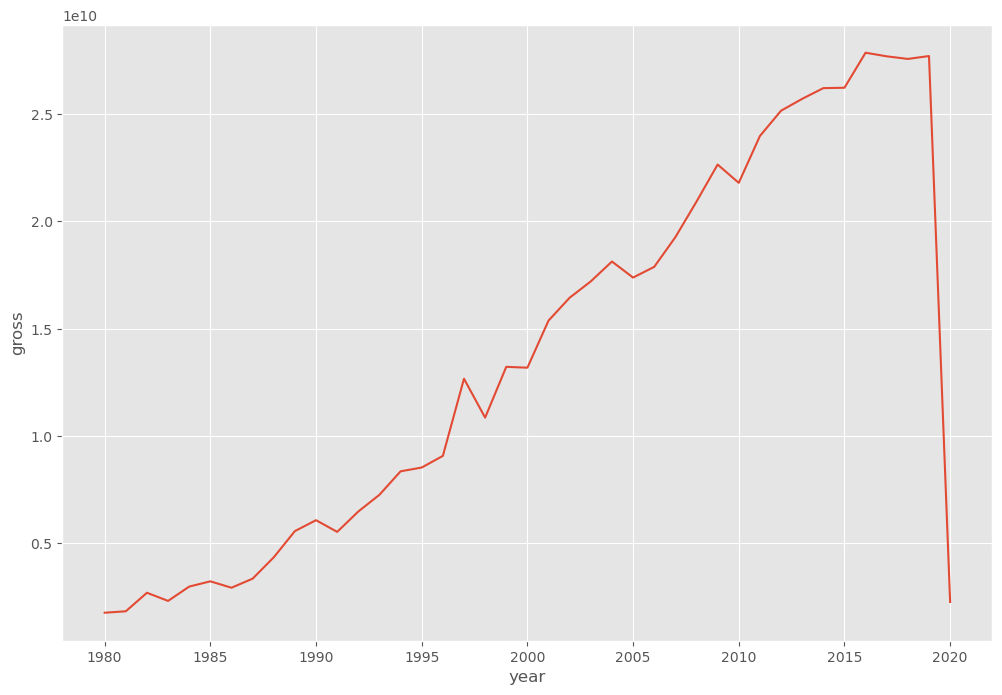

In [138]:
## Yearly growth of gross revenue. The drop in 2020 is due to incomplete data available for that year.

sns.lineplot(x='year',y='gross', data = year_gross_2)